## Import modules and functions

In [7]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
from scipy import stats
import cv2
from pyspark import SparkContext, SparkConf
import skimage
from pathlib import Path
%matplotlib inline
def mean2(x):
    y = np.sum(x) / np.size(x);
    return y
def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r
from copy import deepcopy
from skimage.filters import threshold_otsu,threshold_li
import glob
from IPython.display import clear_output
import scipy.io as spio
import pims
from skimage.measure import regionprops

## Define directory of images

In [8]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/03_Collab/2020_Clara/All files/'

protein="TNR" #TNR,Agg,WFA,HABP

## Make a dictionary to store filenames and spots

In [9]:
results_vglut = {"filename":[],
          "exp condition":[],
           "Manual vglut spots mask":[],
          }
results_syt1 = {"filename":[],
          "exp condition":[],
           "Manual syt spots mask":[],
          }
           
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))      
for i in range(0,len(filelist)):
    if filelist[i].endswith(".tif"): 
        if ("ignore" in str(filelist[i]))==False:
            if ("icy" in str(filelist[i]))==False:
                if "VGLUT1" in str(filelist[i]):
                    if "\\" in str(filelist[i]):
                        #print(7)
                        if (('/').join(filelist[i].split('\\')[:-1])+'\\\\'+filelist[i][:-12].split('\\')[-1] in str(results_vglut["filename"]))==False:
                            print(filelist[i])
                            results_vglut["filename"].append(filelist[i])
                            results_vglut["exp condition"].append(filelist[i][:-12].split('/')[-2])
                    elif (str(filelist[i][:-12]) not in str(results_vglut["filename"]))==True:
                        #print(8)
                        results_vglut["filename"].append(filelist[i])
                        results_vglut["exp condition"].append(filelist[i][:-12].split('/')[-2])


for i in range(0,len(filelist)):
    if filelist[i].endswith(".tif"): 
        if ("ignore" in str(filelist[i]))==False:
            if ("icy" in str(filelist[i]))==False:
                if "SYT1" in str(filelist[i]):
                    if "\\" in str(filelist[i]):
                        #print(7)
                        if (('/').join(filelist[i].split('\\')[:-1])+'\\\\'+filelist[i][:-12].split('\\')[-1] in str(results_syt1["filename"]))==False:
                            print(filelist[i])
                            results_syt1["filename"].append(filelist[i])
                            results_syt1["exp condition"].append(filelist[i][:-12].split('/')[-2])
                    elif (str(filelist[i][:-12]) not in str(results_syt1["filename"]))==True:
                        #print(8)
                        results_syt1["filename"].append(filelist[i])
                        results_syt1["exp condition"].append(filelist[i][:-12].split('/')[-2])

## Display a random image

Image name: stacked__094_HPN18DIVf_Phalloidin-AF405_Homer-gp-AF488_TGN38-rbt-AF594_Vglut1-Star635P_PFA_series9.tif
Experimental condition: TGN38


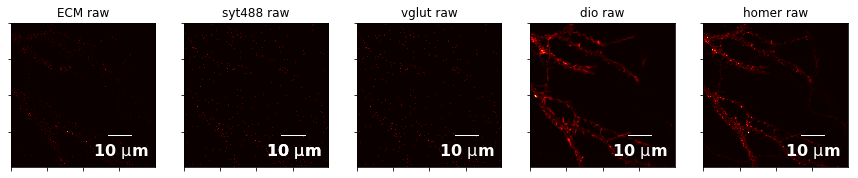

In [10]:
randomno=np.random.randint(1,len(results_vglut["filename"]))

full_image=pims.open(results_vglut["filename"][randomno])

print("Image name:",results_vglut["filename"][randomno].split('/')[-1])
print("Experimental condition:",results_vglut["exp condition"][randomno])

if len(full_image)==7:
    ecm_image=full_image[5] #channel of changing protein (need to subtract 1)
    syt_image=full_image[6]
    vglut_image=full_image[6]
    homer=full_image[3]
    dio=full_image[4]
else:
    ecm_image=full_image[3] #channel of changing protein (need to subtract 1)
    syt_image=full_image[1]
    vglut_image=full_image[1]
    homer=full_image[8]
    dio=full_image[6]

figure=plt.figure(figsize=(15,15))
figure.add_subplot(151)
plt.imshow(ecm_image,interpolation='none',cmap='hot')
plt.title('ECM raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(30, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)


figure.add_subplot(152)
plt.imshow(syt_image,interpolation='none',cmap='hot')
plt.title('syt488 raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(30, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

plt.gca().add_artist(scalebar)

figure.add_subplot(153)
plt.imshow(vglut_image,interpolation='none',cmap='hot')
plt.title('vglut raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(30, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(154)
plt.imshow(dio,interpolation='none',cmap='hot')
plt.title('dio raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(30, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

figure.add_subplot(155)
plt.imshow(homer,interpolation='none',cmap='hot')
plt.title('homer raw')
plt.grid(visible=False)
plt.xticks(visible=False)
plt.yticks(visible=False)
scalebar = ScaleBar(30, 'nm', dimension='si-length',box_alpha=0,location='lower right',length_fraction=0.2,
                       font_properties={'size':16,'weight':'bold'},color='white',border_pad=0.5) # 1 pixel = 0.2 meter
    
plt.gca().add_artist(scalebar)

## Load spots made in Python widget

In [11]:
for image in range(0,len(results_syt1["filename"])):
    results_syt1["Manual syt spots mask"].append(np.load(results_syt1["filename"][image]+'_syt_spots_mask_conservative.npy'))

## Sanity check - see that spots are loaded correctly

15


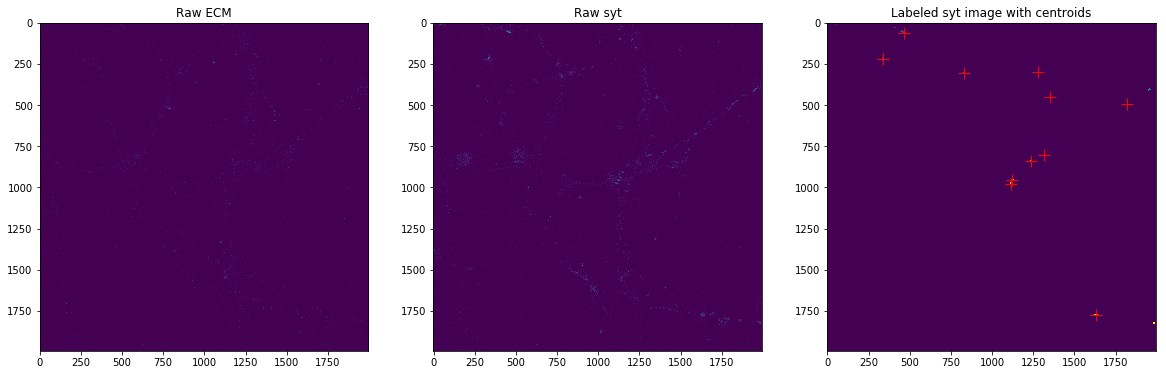

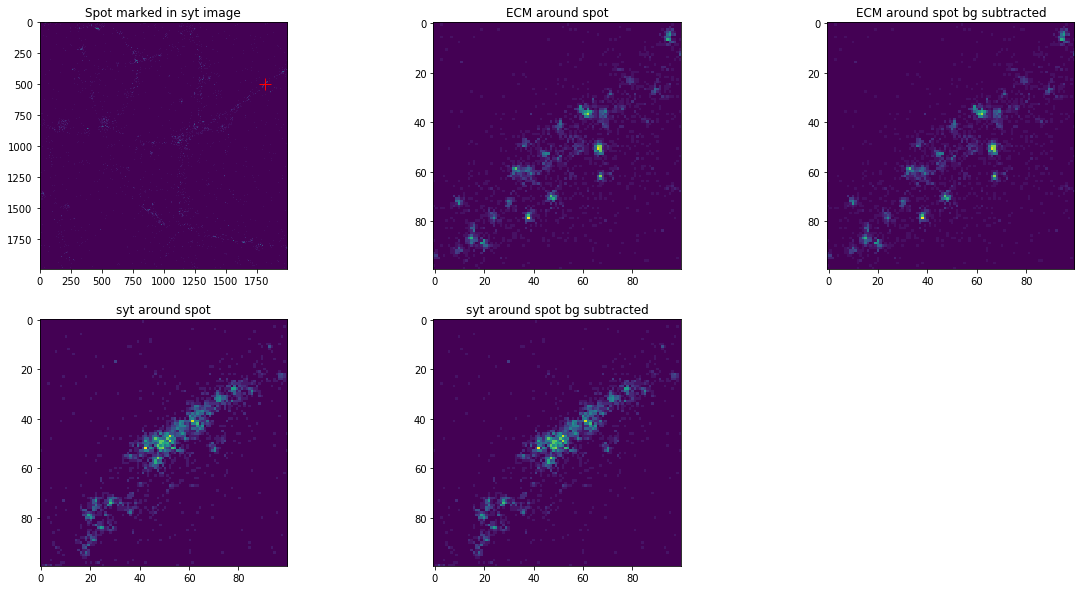

In [12]:
randomno=np.random.randint(1,len(results_syt1["filename"]))


ecm_distribution_around_synapses={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "original_synapse_at_single_spot":[],
                                  "mean_intensty_original_synapse":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  "original_synapse_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_synapse bg subtracted":[]
                                 }

full_image=pims.open(results_syt1["filename"][randomno])


if len(full_image)==7:
    ecm_image=full_image[5] #channel of changing protein (need to subtract 1)
    syt_image=full_image[6]
    vglut_image=full_image[6]
    homer=full_image[3]
    dio=full_image[4]
else:
    ecm_image=full_image[3] #channel of changing protein (need to subtract 1)
    syt_image=full_image[1]
    vglut_image=full_image[1]
    homer=full_image[8]
    dio=full_image[6]

synapse_image=syt_image
#label images
spots_mask=results_syt1["Manual syt spots mask"][randomno]
spots_labeled, cc_num=ndi.label(spots_mask)
#cut out ecm image 4microns around each spot - 200pixels
print(cc_num)
regions = regionprops(spots_labeled)
#fig, ax = plt.subplots(figsize=(10,10))
#ax.imshow(spots_mask,cmap=plt.cm.gray)
synapse_spots_results_syt1_sanity=[]
for props in regions:    
    y0, x0 = props.centroid
    center_of_spot=[0,0]
    center_of_spot[0]=np.round(y0).astype(int)
    center_of_spot[1]=np.round(x0).astype(int)
    #check if the spot gets cut off at the border before taking
    if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
        #cut out the ecm around spot
        ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
              center_of_spot[1]-50:center_of_spot[1]+50]
        #cut out the synapse around spot
        original_synapse_at_single_spot=synapse_image[center_of_spot[0]-50:center_of_spot[0]+50,
              center_of_spot[1]-50:center_of_spot[1]+50]
        if ecm_around_spot.shape==(100,100):
            #save centroid
            synapse_spots_results_syt1_sanity.append(props.centroid)
            ecm_distribution_around_synapses["filename"].append(results_syt1["filename"][randomno])
            ecm_distribution_around_synapses["exp condition"].append(results_syt1["exp condition"][randomno])
            #append mean synapse intensity at spot
            mean_intensty_original_synapse=np.mean(original_synapse_at_single_spot)
            ecm_distribution_around_synapses["mean_intensty_original_synapse"].append(mean_intensty_original_synapse)
            #append ecm spot matrix
            ecm_distribution_around_synapses["ecm_around_single_spot"].append(ecm_around_spot)
            #append synapse spot matrix
            ecm_distribution_around_synapses["original_synapse_at_single_spot"].append(original_synapse_at_single_spot)
            #append ecm spot matrix
            ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

            #after bg subtraction
            ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
            ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
            bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
            ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
            ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

            synapse_around_spot_bgsub=np.array(deepcopy(original_synapse_at_single_spot))
            synapse_around_spot_bgsub=np.divide(synapse_around_spot_bgsub,255)
            bg_synapse=np.mean(ndi.median_filter(synapse_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(synapse_around_spot_bgsub,size=5))
            synapse_around_spot_bgsub=np.subtract(synapse_around_spot_bgsub,bg_synapse)
            synapse_around_spot_bgsub[synapse_around_spot_bgsub<0]=0

            ecm_distribution_around_synapses["mean_intensty_original_synapse bg subtracted"].append(np.nanmean(synapse_around_spot_bgsub))
            ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
            ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"].append(synapse_around_spot_bgsub)
            ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))

fig=plt.figure(figsize=(20,10))
fig.add_subplot(131)
plt.title('Raw ECM')
plt.imshow(ecm_image)

fig.add_subplot(132)
plt.title('Raw syt')
plt.imshow(synapse_image)

fig.add_subplot(133)
plt.title('Labeled syt image with centroids')
plt.imshow(spots_labeled)
for i in range(0,len(synapse_spots_results_syt1_sanity)):
    plt.plot(synapse_spots_results_syt1_sanity[i][1],synapse_spots_results_syt1_sanity[i][0],'+',color='r',markersize=12)

#show random spot
randomno=np.random.randint(1,len(ecm_distribution_around_synapses))
centroid=synapse_spots_results_syt1_sanity[randomno]
fig=plt.figure(figsize=(20,10))
fig.add_subplot(231)
plt.title('Spot marked in syt image')
plt.imshow(synapse_image)
plt.plot(synapse_spots_results_syt1_sanity[randomno][1],synapse_spots_results_syt1_sanity[randomno][0],'+',color='r',markersize=12)

fig.add_subplot(232)
plt.title('ECM around spot')
plt.imshow(ecm_distribution_around_synapses["ecm_around_single_spot"][randomno])

fig.add_subplot(233)
plt.title('ECM around spot bg subtracted')
plt.imshow(ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"][randomno])

fig.add_subplot(234)
plt.title('syt around spot')
plt.imshow(ecm_distribution_around_synapses["original_synapse_at_single_spot"][randomno])

fig.add_subplot(235)
plt.title('syt around spot bg subtracted')
plt.imshow(ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"][randomno])

## Cut out 3x3 microns around each spot

In [13]:
#regionprops centroid = center of spot
ecm_distribution_around_synapses={"filename":[],
                                  "exp condition":[],
                                  "ecm_around_single_spot":[],
                                  "ecm_around_single_spot_mean_intensity":[],
                                  "ecm_around_single_spot bg subtracted":[],
                                  "ecm_around_single_spot_mean_intensity bg subtracted":[],
                                  
                                  "original_synapse_at_single_spot":[],
                                  "mean_intensty_original_synapse":[],
                                  "original_synapse_at_single_spot bg subtracted":[],
                                  "mean_intensty_original_synapse bg subtracted":[],
                                 "synapse size - no pixels in mask":[]}
                                  
for i in range(0,len(results_syt1["filename"])):
    full_image=pims.open(results_syt1["filename"][i])


    
    if len(full_image)==7:
        ecm_image=full_image[5] #channel of changing protein (need to subtract 1)
        syt_image=full_image[6]
    
    else:
        ecm_image=full_image[3] #channel of changing protein (need to subtract 1)
        syt_image=full_image[1]
    
    synapse_image=syt_image
    #label connected components in spots mask
    spots_mask=results_syt1["Manual syt spots mask"][i]
    if spots_mask.size>1:
        spots_labeled, cc_num=ndi.label(spots_mask)
        #cut out ecm around spots - 100px by 100px (2x2 microns) 
        print('No spots in image: ' + str(cc_num))
        regions = regionprops(spots_labeled)
        for props in regions:
            y0, x0 = props.centroid
            center_of_spot=[0,0]
            center_of_spot[0]=np.round(y0).astype(int)
            center_of_spot[1]=np.round(x0).astype(int)
            area=props.area
            #check if the spot gets cut off at the border before taking
            if (((center_of_spot[1]-50>0) & (center_of_spot[1]+50>0))&((center_of_spot[0]-50>0) & (center_of_spot[0]+50>0))):
                #cut out the ecm around spot
                ecm_around_spot=ecm_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                #cut out the synapse around spot
                original_synapse_at_single_spot=synapse_image[center_of_spot[0]-50:center_of_spot[0]+50,
                      center_of_spot[1]-50:center_of_spot[1]+50]
                if ecm_around_spot.shape==(100,100):
                    ecm_distribution_around_synapses["filename"].append(results_syt1["filename"][i])
                    ecm_distribution_around_synapses["exp condition"].append(results_syt1["exp condition"][i])
                    #append mean synapse intensity at spot
                    mean_intensty_original_synapse=np.mean(original_synapse_at_single_spot)
                    ecm_distribution_around_synapses["mean_intensty_original_synapse"].append(mean_intensty_original_synapse)
                    #append ecm spot matrix
                    ecm_distribution_around_synapses["ecm_around_single_spot"].append(ecm_around_spot)
                    #append synapse spot matrix
                    ecm_distribution_around_synapses["original_synapse_at_single_spot"].append(original_synapse_at_single_spot)
                    #append ecm spot matrix
                    ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity"].append(np.nanmean(ecm_around_spot))

                    #after bg subtraction
                    ecm_around_spot_bgsub=np.array(deepcopy(ecm_around_spot))
                    ecm_around_spot_bgsub=np.divide(ecm_around_spot_bgsub,255)
                    bg_ecm=np.mean(ndi.median_filter(ecm_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(ecm_around_spot_bgsub,size=5))
                    ecm_around_spot_bgsub=np.subtract(ecm_around_spot_bgsub,bg_ecm)
                    ecm_around_spot_bgsub[ecm_around_spot_bgsub<0]=0

                    synapse_around_spot_bgsub=np.array(deepcopy(original_synapse_at_single_spot))
                    synapse_around_spot_bgsub=np.divide(synapse_around_spot_bgsub,255)
                    bg_synapse=np.mean(ndi.median_filter(synapse_around_spot_bgsub,size=5))+0*np.std(ndi.median_filter(synapse_around_spot_bgsub,size=5))
                    synapse_around_spot_bgsub=np.subtract(synapse_around_spot_bgsub,bg_synapse)
                    synapse_around_spot_bgsub[synapse_around_spot_bgsub<0]=0

                    ecm_distribution_around_synapses["mean_intensty_original_synapse bg subtracted"].append(np.nanmean(synapse_around_spot_bgsub))
                    ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"].append(ecm_around_spot_bgsub)
                    ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"].append(synapse_around_spot_bgsub)
                    ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nanmean(ecm_around_spot_bgsub))            
                    ecm_distribution_around_synapses["synapse size - no pixels in mask"].append(area)            
                    
    else:
        print('spots is nan')
        ecm_distribution_around_synapses["filename"].append(results_syt1["filename"][i])
        ecm_distribution_around_synapses["exp condition"].append(results_syt1["exp condition"][i])
                    
        ecm_distribution_around_synapses["ecm_around_single_spot"].append(np.nan)
        ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity"].append(np.nan)
        ecm_distribution_around_synapses["ecm_around_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_synapses["ecm_around_single_spot_mean_intensity bg subtracted"].append(np.nan)

        ecm_distribution_around_synapses["original_synapse_at_single_spot"].append(np.nan)
        ecm_distribution_around_synapses["mean_intensty_original_synapse"].append(np.nan)
        ecm_distribution_around_synapses["original_synapse_at_single_spot bg subtracted"].append(np.nan)
        ecm_distribution_around_synapses["mean_intensty_original_synapse bg subtracted"].append(np.nan)
        ecm_distribution_around_synapses["synapse size - no pixels in mask"].append(np.nan)

No spots in image: 70
No spots in image: 83
No spots in image: 74
No spots in image: 101
No spots in image: 148
No spots in image: 15
No spots in image: 84
No spots in image: 88
No spots in image: 12
No spots in image: 9
No spots in image: 14
No spots in image: 54
No spots in image: 54
No spots in image: 13
No spots in image: 69
No spots in image: 82
No spots in image: 43
No spots in image: 30
No spots in image: 25
No spots in image: 67
No spots in image: 28
No spots in image: 58
No spots in image: 104
No spots in image: 29
No spots in image: 81
No spots in image: 80
No spots in image: 71
No spots in image: 24
No spots in image: 55
No spots in image: 36
No spots in image: 42
No spots in image: 64
No spots in image: 84
No spots in image: 39
No spots in image: 64
No spots in image: 44
No spots in image: 105
No spots in image: 111
No spots in image: 79
No spots in image: 190
No spots in image: 33
No spots in image: 117
No spots in image: 51
No spots in image: 50
No spots in image: 32
No s

## Make a dataframe of ECM/vglut in spots

In [14]:
df=pd.DataFrame(ecm_distribution_around_synapses)

In [15]:
#make df, which also contains column names for plotting (drug, condition)
df['Protein']='None'
df.loc[df['filename'].str.contains('TGN'), 'Protein'] = 'TGN38'
df.loc[df['filename'].str.contains('alreticulin'), 'Protein'] = 'Calreticulin'
df.loc[df["filename"].str.contains('Synaptopodin'), 'Protein'] = 'Synaptopodin'
df.loc[df["filename"].str.contains('ERGIC'), 'Protein'] = 'ERGIC'
df['Exp']='None'
df.loc[df['filename'].str.contains('N2_'), 'Exp'] = 'N2'
df.loc[df['filename'].str.contains('N1_'), 'Exp'] = 'N1'
df.loc[df['filename'].str.contains('N0_'), 'Exp'] = 'N0'
df.loc[df['filename'].str.contains('N3_'), 'Exp'] = 'N3'
df.loc[df['filename'].str.contains('N4_'), 'Exp'] = 'N4'


df.loc[df['filename'].str.contains('Other Data'), 'Exp'] = 'Other Data'
df.loc[df['filename'].str.contains('BIN'), 'Exp'] = 'BIN'

In [16]:
df["Protein"].unique()

array(['Calreticulin', 'ERGIC', 'Synaptopodin', 'TGN38'], dtype=object)

## Look at a random spot image

Text(0.5, 1.0, 'Protein around synapse spot bg subtracted')

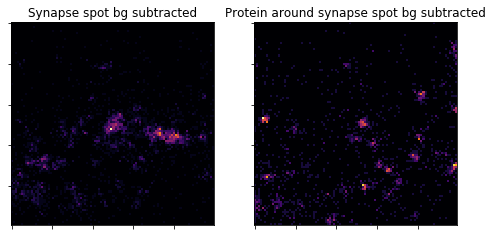

In [17]:
randomno=np.random.randint(1,len(df))
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
plt.imshow(df["original_synapse_at_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Synapse spot bg subtracted')
fig.add_subplot(122)
plt.imshow(df["ecm_around_single_spot"][randomno],cmap='inferno')
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.gca().set(aspect='equal',adjustable='box')
plt.grid(False)
plt.title('Protein around synapse spot bg subtracted')

## Iterate over dataframe to add means normalized to median of experiment

## Specify protein to look at

In [18]:
protein="Calreticulin" #Calreticulin, TGN38, Synaptopodin

In [19]:
#temp
df2=deepcopy(df[df["Protein"]==protein])
df2=df2[df2["Exp"]!="Other Data"]
df2=df2.reset_index(drop=True)

## Corellation of everything - quicklook

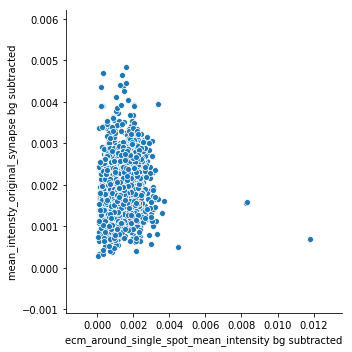

In [20]:
sns.relplot(x="ecm_around_single_spot_mean_intensity bg subtracted",
            y="mean_intensty_original_synapse bg subtracted",data=df2)

In [21]:
expnam=[]
medtnr=[]
medsyt=[]
for exp in df2["Exp"].unique():
    dfexp=df2[df2["Exp"]==exp]
    med_tnr=dfexp["ecm_around_single_spot_mean_intensity bg subtracted"].median()
    med_syt=dfexp["mean_intensty_original_synapse bg subtracted"].median()
    print(exp+' - med tnr: '+str(med_tnr)+' - med syt: '+str(med_syt))
    expnam.append(exp)
    medtnr.append(med_tnr)
    medsyt.append(med_syt)
df2["ecm mean int norm2med"]=np.nan
df2["syt mean int norm2med"]=np.nan
for i in range(0,len(df2)):
    for j in range(0,len(expnam)):
        if df2["Exp"][i]==expnam[j]:
            df2["ecm mean int norm2med"][i]=df2["ecm_around_single_spot_mean_intensity bg subtracted"][i]/medtnr[j]
            df2["syt mean int norm2med"][i]=df2["mean_intensty_original_synapse bg subtracted"][i]/medsyt[j]
        

N1 - med tnr: 0.0006865273725497132 - med syt: 0.0020803384313682074
N4 - med tnr: 0.0017191209411760995 - med syt: 0.0018944262549007434
N0 - med tnr: 0.002111637647056267 - med syt: 0.0012592984313682478
N3 - med tnr: 0.0014032847058835613 - med syt: 0.0026554729411622075
N2 - med tnr: 0.0017413239215684172 - med syt: 0.0019318861960724348


/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taldankovich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Outlier removal - large objects

In [22]:
meani=df2["synapse size - no pixels in mask"].mean()
stdi=df2["synapse size - no pixels in mask"].std()
df2=df2[df2["synapse size - no pixels in mask"]<(meani+3*stdi)]

## Outlier removal - bright/dim objects (3 standard deviations from mean)

In [23]:
meani=df2["syt mean int norm2med"].mean()
stdi=df2["syt mean int norm2med"].std()
df2=df2[df2["syt mean int norm2med"]<(meani+3*stdi)]
df2=df2[df2["syt mean int norm2med"]>(meani-3*stdi)]

## Outlier removal - 99th percentile - not using

In [16]:
df2=df2[df2["ecm mean int norm2med"]<
               df2["ecm mean int norm2med"].quantile(.99)]
df2=df2[df2["syt mean int norm2med"]<
               df2["syt mean int norm2med"].quantile(.99)]

## Split data into 5 ordinal bins containing an equal no. of spots

In [24]:
##sort df according to synapse intensity
df3=deepcopy(df2)
df3=df3.sort_values("syt mean int norm2med",ascending=True)
df3=df3.reset_index(drop=True)
#split into 5 separate dfs, add column with number
a, b, c,d,e = np.split(df3, [int(.2*len(df3)),int(.4*len(df3)),int(.6*len(df3)),int(.8*len(df3))])
a['Synapse mean intensity ordinal bin']=0
b['Synapse mean intensity ordinal bin']=1
c['Synapse mean intensity ordinal bin']=2
d['Synapse mean intensity ordinal bin']=3
e['Synapse mean intensity ordinal bin']=4
#combine split dfs into one
dfnew=pd.concat([a,b,c,d,e],axis=0,ignore_index=True)

## Dataframe for means of individual experiments

In [25]:
synapse_bin_type='Synapse mean intensity ordinal bin'
means_in_bins_exps={"Exp name":[],"bin number":[],"mean syt":[],"mean tnr":[],"number of spots":[],
                    "mean syt int in bin overall":[]}
for exp in dfnew["Exp"].unique():
    dfexp=dfnew[dfnew["Exp"]==exp]
    for i in range(0,5):       
        mean_in_bin=dfnew[dfnew[synapse_bin_type].astype(int)==i]["syt mean int norm2med"].mean()
        #print(mean_in_bin)
        dfplot=dfexp[(dfexp[synapse_bin_type].astype(int)==i)]
        means_in_bins_exps["Exp name"].append(exp)
        means_in_bins_exps["bin number"].append(i)
        means_in_bins_exps["mean syt int in bin overall"].append(mean_in_bin)
        means_in_bins_exps["mean syt"].append(dfplot["syt mean int norm2med"].mean())
        means_in_bins_exps["mean tnr"].append(dfplot["ecm mean int norm2med"].mean())
        nosynapses=len(dfplot)
        means_in_bins_exps["number of spots"].append(nosynapses)
dfmeans=pd.DataFrame(means_in_bins_exps)
#dfmeans["mean syt int in bin overall"]=np.around(dfmeans["mean syt int in bin overall"],1)

In [26]:
dfmeans

,Exp name,bin number,mean syt,mean tnr,number of spots,mean syt int in bin overall
0,N4,0,0.519460,0.956507,96,0.529944
1,N4,1,0.797600,0.922826,96,0.795688
2,N4,2,0.979677,1.035585,72,0.987124
3,N4,3,1.190849,1.017296,90,1.182110
4,N4,4,1.506298,1.112770,102,1.480344
5,N1,0,0.551266,0.678521,66,0.529944
6,N1,1,0.801154,1.057472,87,0.795688
7,N1,2,0.991491,1.253383,110,0.987124
8,N1,3,1.180605,1.239661,102,1.182110
9,N1,4,1.416040,1.229337,56,1.480344


In [27]:
import datetime
date='{date:%Y%m%d}'.format( date=datetime.datetime.now() )
dfmeans.to_pickle(expdir + protein+'_syt_'+date+'.pkl')

In [288]:
dfmeans=pd.read_pickle(expdir + protein+'_syt_'+date+'.pkl')

## Plot

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 432x288 with 0 Axes>

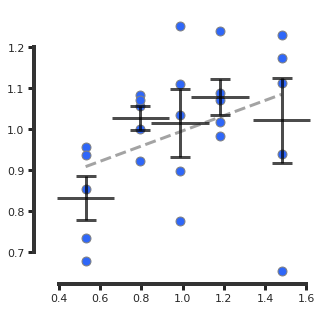

In [28]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")
var="mean tnr"

df2plot=dfmeans[dfmeans["Exp name"]!="Other Data"]

fig=plt.figure(figsize=(5,5))
g=sns.scatterplot(x="mean syt int in bin overall",y="mean tnr",
                data=df2plot,s=80,color="#2F67F8",linewidth=1,edgecolor='grey')

plt.errorbar(x = df2plot["mean syt int in bin overall"].unique()
,
             y=[df2plot[df2plot["bin number"]==0][var].mean(),
                df2plot[df2plot["bin number"]==1][var].mean(),
                df2plot[df2plot["bin number"]==2][var].mean(),
                df2plot[df2plot["bin number"]==3][var].mean(),
                df2plot[df2plot["bin number"]==4][var].mean()],
             yerr=[df2plot[df2plot["bin number"]==0][var].sem(),
                   df2plot[df2plot["bin number"]==1][var].sem(),
                   df2plot[df2plot["bin number"]==2][var].sem(),
                   df2plot[df2plot["bin number"]==3][var].sem(),
                   df2plot[df2plot["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3,alpha=.7,)

plt.errorbar(x = df2plot["mean syt int in bin overall"].unique()
,
             y=[df2plot[df2plot["bin number"]==0][var].mean(),
                df2plot[df2plot["bin number"]==1][var].mean(),
                df2plot[df2plot["bin number"]==2][var].mean(),
                df2plot[df2plot["bin number"]==3][var].mean(),
                df2plot[df2plot["bin number"]==4][var].mean()],
             yerr=None,
             xerr=[.14,.14,.14,.14,.14],ecolor='black',fmt='none',capsize=0,linewidth=3,capthick=3,alpha=.7,)


plt.rcParams['font.sans-serif'] = 'Helvetica'
g.grid(False)
#plt.ylim([0.55,1.3])
#plt.xlim([.2,2.8])

#fit linear curve
dfnonans=df2plot.dropna()
x=dfnonans["mean syt int in bin overall"].unique()
y=dfnonans.groupby("mean syt int in bin overall").mean()["mean tnr"].values
m,b = np.polyfit(x, y, 1) 
plt.plot( x, m*x+b, 'k',linestyle='dashed',alpha=.4,linewidth=3) 

#formatting
g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('')
#plt.yticks([0.7,0.9,1.1,1.3],color='#333333',size=20)
#plt.xticks([0.4, 0.7, 1. , 1.4, 2.6],color='#333333',size=20,rotation=45)


diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
fig.savefig(diri+'3b_tnrsytcorr.svg', bbox_inches='tight', format='svg')

## Calculate the Pearson's R and significance

In [29]:
from pydoc import help
from scipy.stats.stats import pearsonr
[pearson, pval]=pearsonr(df2plot["mean tnr"],df2plot["mean syt int in bin overall"])
print(str(pearson**2))
print(pval)

0.13979961342371364
0.06559087363029986


<Figure size 432x288 with 0 Axes>

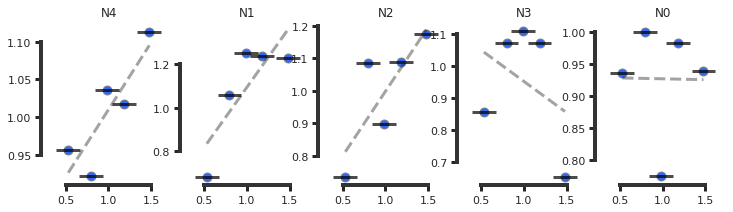

In [92]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")
var="mean tnr"
fig=plt.figure(figsize=(12,3))
count=0
for exp in dfmeans["Exp name"].unique():
    count+=1
    fig.add_subplot(1,5,count)
    plt.title(exp)

    df2plot=dfmeans[dfmeans["Exp name"]==exp]
    g=sns.scatterplot(x="mean syt int in bin overall",y="mean tnr",
                    data=df2plot,s=80,color="#2F67F8",linewidth=1,edgecolor='grey')

    plt.errorbar(x = df2plot["mean syt int in bin overall"].unique()
    ,
                 y=[df2plot[df2plot["bin number"]==0][var].mean(),
                    df2plot[df2plot["bin number"]==1][var].mean(),
                    df2plot[df2plot["bin number"]==2][var].mean(),
                    df2plot[df2plot["bin number"]==3][var].mean(),
                    df2plot[df2plot["bin number"]==4][var].mean()],
                 yerr=[df2plot[df2plot["bin number"]==0][var].sem(),
                       df2plot[df2plot["bin number"]==1][var].sem(),
                       df2plot[df2plot["bin number"]==2][var].sem(),
                       df2plot[df2plot["bin number"]==3][var].sem(),
                       df2plot[df2plot["bin number"]==4][var].sem()],
                 xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3,alpha=.7,)

    plt.errorbar(x = df2plot["mean syt int in bin overall"].unique()
    ,
                 y=[df2plot[df2plot["bin number"]==0][var].mean(),
                    df2plot[df2plot["bin number"]==1][var].mean(),
                    df2plot[df2plot["bin number"]==2][var].mean(),
                    df2plot[df2plot["bin number"]==3][var].mean(),
                    df2plot[df2plot["bin number"]==4][var].mean()],
                 yerr=None,
                 xerr=[.14,.14,.14,.14,.14],ecolor='black',fmt='none',capsize=0,linewidth=3,capthick=3,alpha=.7,)


    plt.rcParams['font.sans-serif'] = 'Helvetica'
    g.grid(False)
    #plt.ylim([0.55,1.3])
    #plt.xlim([.2,2.8])

    #fit linear curve
    dfnonans=df2plot.dropna()
    x=dfnonans["mean syt int in bin overall"].unique()
    y=dfnonans.groupby("mean syt int in bin overall").mean()["mean tnr"].values
    m,b = np.polyfit(x, y, 1) 
    plt.plot( x, m*x+b, 'k',linestyle='dashed',alpha=.4,linewidth=3) 

    #formatting
    g.xaxis.set_tick_params(width=3)
    g.yaxis.set_tick_params(width=3)
    for axis in ['top','bottom','left','right']:
      g.spines[axis].set_linewidth(4)
      g.spines[axis].set_color('#333333')
      g.spines[axis].set_alpha(1)
    offsets={"left":10,"bottom":0}
    trims={"left":True,"bottom":True,"right":False}
    sns.despine(ax=g,right=True,top=True,bottom=False,trim=trims,offset=offsets)
    g.set_ylabel('')
    g.set_xlabel('')
    #plt.yticks([0.7,0.9,1.1,1.3],color='#333333',size=20)
    #plt.xticks([0.4, 0.7, 1. , 1.4, 2.6],color='#333333',size=20,rotation=45)


    diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
    fig.savefig(diri+'3b_tnrsytcorr.svg', bbox_inches='tight', format='svg')

## Try different fit

Text(0.5, 0, '')

/Users/taldankovich/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 432x288 with 0 Axes>

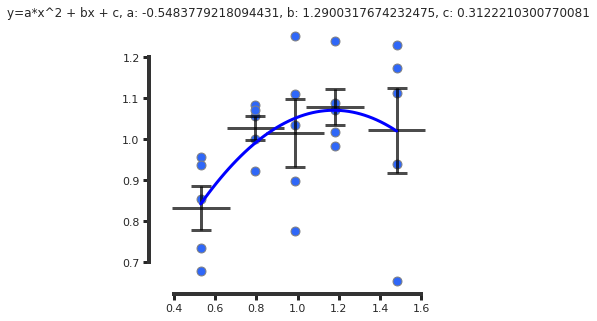

In [30]:
sns.set(font_scale=2.5)
sns.set(font="Arial")
sns.set_style("ticks")
sns.despine()
sns.set_palette("Set2")
var="mean tnr"

df2plot=dfmeans#[dfmeans["Exp name"]!="Other Data"]

fig=plt.figure(figsize=(5,5))

g=sns.scatterplot(x="mean syt int in bin overall",y="mean tnr",
                data=df2plot,s=80,color="#2F67F8",linewidth=1,edgecolor='grey')

plt.errorbar(x = df2plot["mean syt int in bin overall"].unique()
,
             y=[df2plot[df2plot["bin number"]==0][var].mean(),
                df2plot[df2plot["bin number"]==1][var].mean(),
                df2plot[df2plot["bin number"]==2][var].mean(),
                df2plot[df2plot["bin number"]==3][var].mean(),
                df2plot[df2plot["bin number"]==4][var].mean()],
             yerr=[df2plot[df2plot["bin number"]==0][var].sem(),
                   df2plot[df2plot["bin number"]==1][var].sem(),
                   df2plot[df2plot["bin number"]==2][var].sem(),
                   df2plot[df2plot["bin number"]==3][var].sem(),
                   df2plot[df2plot["bin number"]==4][var].sem()],
             xerr=None,ecolor='black',fmt='none',capsize=10,linewidth=3,capthick=3,alpha=.7,)

plt.errorbar(x = df2plot["mean syt int in bin overall"].unique()
,
             y=[df2plot[df2plot["bin number"]==0][var].mean(),
                df2plot[df2plot["bin number"]==1][var].mean(),
                df2plot[df2plot["bin number"]==2][var].mean(),
                df2plot[df2plot["bin number"]==3][var].mean(),
                df2plot[df2plot["bin number"]==4][var].mean()],
             yerr=None,
             xerr=[.14,.14,.14,.14,.14],ecolor='black',fmt='none',capsize=0,linewidth=3,capthick=3,alpha=.7,)


plt.rcParams['font.sans-serif'] = 'Helvetica'
g.grid(False)
#plt.ylim([0.55,1.3])
#plt.xlim([.2,2.8])

#fit linear curve
dfnonans=df2plot.dropna()
x=dfnonans["mean syt int in bin overall"].unique()
y=dfnonans.groupby("mean syt int in bin overall").mean()["mean tnr"].values
m,b = np.polyfit(x, y, 1) 
#plt.plot( x, m*x+b, 'blue',linestyle='dashed',alpha=.4,linewidth=3) 

#power of 2 fit
a,b,c = np.polyfit(x, y, 2) 
new_x = np.linspace(x[0], x[-1])
plt.plot( new_x, a*(new_x**2)+b*new_x+c, 'blue',linewidth=3) 
plt.title('y=a*x^2 + bx + c, a: '+str(a)+', b: '+str(b)+', c: '+str(c))


#exponential fit
from scipy.optimize import curve_fit 
def test(x, a, b): 
    return a*np.exp(b*x)
param, param_cov = curve_fit(test, x, y)
ans = (param[0]*(np.exp(param[1]*x))) 
#plt.plot(new_x, ans, '--', color ='blue', label ="optimized data") 
#plt.title('y=a*b^x, a: '+str(param[0])+', b: '+str(param[1]))

#formatting
g.xaxis.set_tick_params(width=3)
g.yaxis.set_tick_params(width=3)
for axis in ['top','bottom','left','right']:
  g.spines[axis].set_linewidth(4)
  g.spines[axis].set_color('#333333')
  g.spines[axis].set_alpha(1)
offsets={"left":10,"bottom":0}
trims={"left":True,"bottom":True,"right":False}
sns.despine(ax=g,right=True,top=True,bottom=False,trim=trims,offset=offsets)
g.set_ylabel('')
g.set_xlabel('')
#plt.yticks([0.7,0.9,1.1,1.3],color='#333333',size=20)
#plt.xticks([0.4, 0.7, 1. , 1.4, 2.6],color='#333333',size=20,rotation=45)


#diri="/Volumes/Macintosh HD/Users/taldankovich/Downloads/figures/"
#fig.savefig(diri+'3b_tnrsytcorr.svg', bbox_inches='tight', format='svg')

## No. synapses in each bin

In [94]:
for bin in dfnew["Synapse mean intensity ordinal bin"].unique():
    print(len(dfnew[dfnew["Synapse mean intensity ordinal bin"]==bin]))

273
273
273
273
274


## Plot random spot from each bin

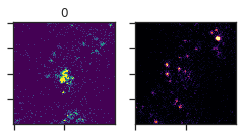

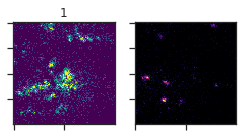

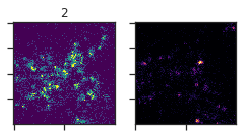

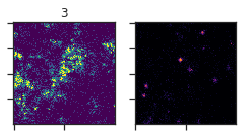

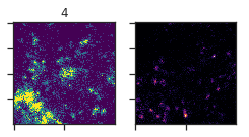

In [95]:

for i in range(0,5):
    df2show=dfnew[dfnew["Synapse mean intensity ordinal bin"]==i]
    df2show=df2show.reset_index(drop=True)
    randomno=np.random.randint(1,len(df2show))
    fig=plt.figure(figsize=(4,2))
    fig.add_subplot(121)
    plt.title(i)
    plt.imshow(df2show["original_synapse_at_single_spot"][randomno],cmap='viridis',vmin=32768,vmax=32775)
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.gca().set(aspect='equal',adjustable='box')
    plt.grid(False)
    #plt.title('Synapse spot bg subtracted')
    fig.add_subplot(122)
    plt.imshow(df2show["ecm_around_single_spot"][randomno],cmap='inferno',vmin=32768,vmax=32786)
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.gca().set(aspect='equal',adjustable='box')
    plt.grid(False)
    #plt.title('Protein around synapse spot bg subtracted')

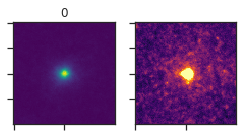

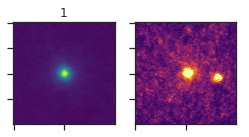

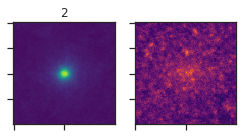

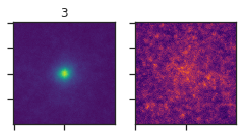

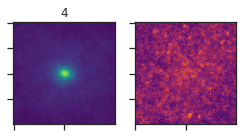

In [31]:

for i in range(0,5):
    df2show=dfnew[dfnew["Synapse mean intensity ordinal bin"]==i]
    df2show=df2show.reset_index(drop=True)
    
    fig=plt.figure(figsize=(4,2))
    fig.add_subplot(121)
    plt.title(i)
    plt.imshow(df2show["original_synapse_at_single_spot bg subtracted"].mean(),cmap='viridis',
               vmin=.02*np.min(dfnew["original_synapse_at_single_spot bg subtracted"].mean()),
               vmax=1.1*np.max(dfnew["original_synapse_at_single_spot bg subtracted"].mean()))
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.gca().set(aspect='equal',adjustable='box')
    plt.grid(False)
    #plt.title('Synapse spot bg subtracted')
    fig.add_subplot(122)
    plt.imshow(df2show["ecm_around_single_spot bg subtracted"].mean(),cmap='inferno',
               vmin=.02*np.min(dfnew["ecm_around_single_spot bg subtracted"].mean()),
               vmax=.8*np.max(dfnew["ecm_around_single_spot bg subtracted"].mean()))
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.gca().set(aspect='equal',adjustable='box')
    plt.grid(False)
    #plt.title('Protein around synapse spot bg subtracted')